# Linear Regression
## Simple Linear Regreesion

Linear relation ship with X and Y
\begin{equation}
Y \approx \beta_0 + \beta_1 X
\end{equation}

After using the training date, to get the estimated (predicted) Y on the basis of $X=x$, and hat symbol denote the estimated value 
\begin{equation}
\hat y = \hat \beta_0 + \hat \beta_1 x 
\end{equation}



###  Estimating the Coefficients (by using *least squares coefficient estimates*)

*Residual sum of squares* (RSS) as

$$RSS = e_1^2 + e_2^2 + \dots + e_n^2 
$$
where $e_i = y_i-\hat y_i$. Then expand it into

\begin{equation}
RSS = (y_1-\hat\beta_0-\hat \beta_1x_1)^2 + (y_2-\hat\beta_0-\hat \beta_1x_2)^2 + \dots + (y_n-\hat\beta_0-\hat \beta_1x_n)^2 = \sum_{i=1}^{n}(y_i-\hat\beta_0-\hat \beta_1x_i)^2
\end{equation}

After this, using the *least squares approach*, to calculate the condition to achieve minimal RSS
$$
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_1} = 2 \left( \beta_1\sum_{i=1}^{n}x_i^2 -\sum_{i=1}^{n}(y_i-\beta_0)x_i \right)=0, \\
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_0} = 2 \left( n \beta_0 -\sum_{i=1}^{n}(y_i-\beta_1x_i) \right)=0
$$

So, 
\begin{equation}
\hat\beta_1=\cfrac {\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^{n}(x_i-\bar x)^2}, \\
\hat\beta_0 = \bar y - \hat \beta_1 \bar x,
\end{equation}
Where $\bar x =\sum_{i=1}^{n}x_i$ and $\bar y =\sum_{i=1}^{n}y_i$, which are the mean value of samples.

In [23]:
# Import & Init Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn')

In [24]:
# Loading ad data
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


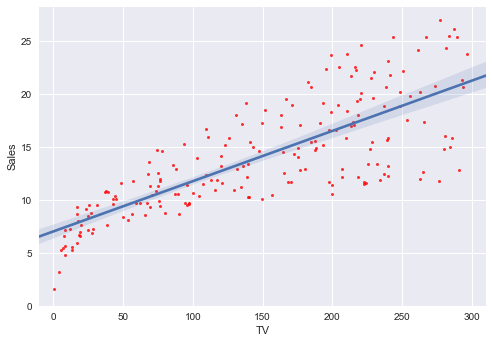

In [208]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=95, scatter_kws={'color':'r', 's':9})

# Plot the errorbar directly on ax1
#ax.errorbar(np.arange(len(data["x"])), data["y"], yerr=data["s"])
plt.xlim(-10,310)
plt.ylim(ymin=0);

#### Figure 3.1 the least squares fit for the regression of sales onto TV 

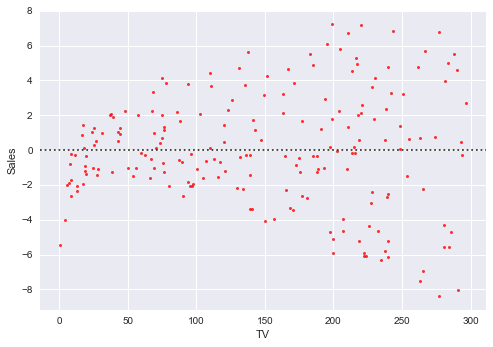

In [26]:
# Plot with the error
sns.residplot(advertising.TV, advertising.Sales, order=1, scatter_kws={'color':'r', 's':9})

In [27]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
    
# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss


14.0225
[0.04753664]


2.1025305831313514

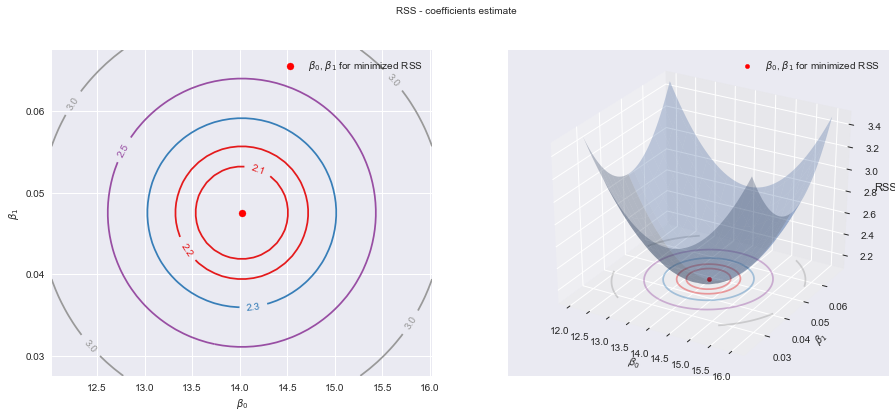

In [28]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - coefficients estimate', fontsize=10)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=10)
    ax.set_ylabel(r'$\beta_1$', fontsize=10)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

#### Figure 3.2 Contour and three-dimensional plots of the RSS 

### Assessing the accuary of Coefficient Esitimates

Releaship with error as below, and  $\beta_0$ stands for incercept term and $\beta_1$ stands for slope.

\begin{equation}
Y=\beta_0+\beta_1X+\epsilon
\end{equation}

Created a 100 random $X_s$,, and generated 100 corresponding $Y_s$ from the model

\begin{equation}
Y=2+3X+\epsilon
\end{equation}

In [215]:
x = np.random.uniform(-2,2,100)
rand = np.random.random_sample(size=100)
df1= pd.DataFrame({'x': x, 'y': 2+3*x,"Est.":0})
df = pd.DataFrame({'x': x, 'y': 2+3*x + np.random.random()*x*x+rand*2,"Est.":1})


all = df.append(df1)
all.set_index("x")
#(df1.y-df.y)/df.x

#all.info()


,y,Est.
x,,
0.367181,4.137640,1
0.240204,3.194187,1
-0.918180,1.564665,1
-0.947646,1.619123,1
1.163671,7.188273,1
-0.582600,1.255610,1
0.595109,5.391311,1
1.773233,9.479593,1
0.079875,3.104619,1


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


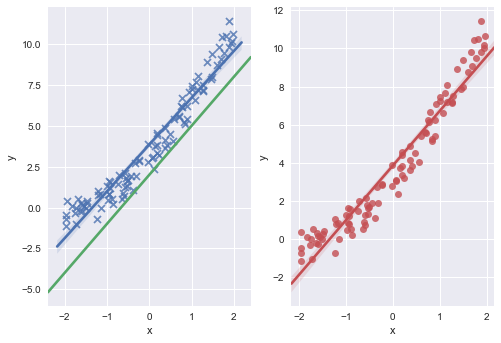

In [217]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tell pointplot to plot on ax1 with the ax argument
#sns.pointplot(x="x", y="y", data=data, ax=ax1)
#sns.lmplot(x="x",y = "y", data=all, hue="Est.", palette="Set1", ax=ax1)
sns.regplot(x="x",y = "y", data=df,  ax=ax1, marker="x")
sns.regplot(x="x",y = "y", data=df1,  ax=ax1, marker='')

# Tell the factorplot to plot on ax2 with the ax argument
# Also store the FacetGrid in 'g'
#g=sns.factorplot(x="x", y="y", data=data, ax=ax2)
sns.regplot(x="x", y="y", data=df, ax=ax2);

# Close the FacetGrid figure which we don't need (g.fig)
#plt.close(g.fig)
plt.show()



#### Figure 3.3 Real vs Estimated
Left: The red line represents the true rela- tionship & Right: The population regression line is again shown in red, and the least squares line in dark blue. 

Computing the *standard error* by using $\hat \mu$ based on $SE(\hat\mu)$:
\begin{equation}
Var(\hat \mu) = SE(\hat \mu)^2 = \cfrac{\sigma^2}{n}
\end{equation}

The same, the *standard error* of $\hat \beta_0$ and $\hat \beta_1$ could be derived from:
\begin{equation}
SE(\hat \beta_0)^2 = \sigma^2\left[\cfrac{1}{n}+\cfrac{\bar x^2}{\sum_{i=1}^{n}(x_i-\bar x)^2}\right], SE(\hat \beta_1)^2 = \cfrac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar x)^2}
\end{equation}

Based on that the $RSE = \sqrt{RSS/(n-2)}$ RSE stands *residual standard error*.

The *confidential intervals* could be estimated by SE, For linear regression 95% confidence interval for $\beta_1$ is approximately takes the form:

\begin{equation}
\hat\beta_1\pm 2* SE(\hat\beta_1)
\end{equation}

In that case, the 95% chance that the interval
\begin{equation}
\left[\hat\beta_1- 2\cdot SE(\hat\beta_1), \space \hat\beta_1+2\cdot SE(\hat\beta_1)\right]
\end{equation}

Will contain the true value of $\beta_1$. Similarly, a confidence interval for \beta_0 is app. takes the form
\begin{equation}
\hat\beta_0\pm 2* SE(\hat\beta_0)
\end{equation}

Then, we use *t-statistic* to do the *null hypothesis* test, which means if $$H_0: \beta_1=0$$ then there is not relationship between X and Y; other wise if $$H_a: \beta_1\ne0,$$ means there are relationsip between X and Y. And in practice we compute *t-statistic* given by:

\begin{equation}
t=\frac{\hat\beta_1-0}{SE(\hat\beta_1)}
\end{equation}


In [300]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]
#est.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053



###  Assessing the Accuracy of the Model



For *alternative hypothesis* there are two ways to assess the related quatities of linear regression fit.

#### Residual Standard Error

RSE is an estimate of the standard deviation of $\epsilon$. 

\begin{equation}
RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n}(y_i-\hat y_i)^2}
\end{equation}

Note that RSS was defined in (3) in 3.1.1, and is given by 
\begin{equation}
RSS = \sum_{i=1}^{n}(y_i-\hat y_i)^2
\end{equation}

In [261]:
#Statsmodels
# RSS with regression coefficients
RSS = ((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()

In [278]:
#scikit-learn implementation of linear regression
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print("beta_0 is", regr.intercept_)
print("beta_1 is", regr.coef_[0])

Sales_pred = regr.predict(X)

RSS = ((advertising.Sales - (regr.intercept_ + regr.coef_[0]*advertising.TV))**2).sum()
RSE = np.sqrt(1/(len(advertising.Sales)-2)*RSS)
#print("RSE is %i and RSE is %i", RSE, RSS)
'RSE is {RSE} and RSS is {RSS}'.format(RSE=RSE, RSS=RSS)

beta_0 is 7.032593549127695
beta_1 is 0.04753664043301975


'RSE is 3.2586563686504624 and RSS is 2102.5305831313512'

####  $R^2$ Statistic
RSE provides and absolute measure of lack of fit of the model, $R^2$ is calculated by:
\begin{equation}
R^2 = \frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}
\end{equation}
Where $TSS = \sum(y_i-\hat y)^2$, is the *total sum of squares* which measures the total variance in response Y.

The $R^2$ is a measure of the linear relationship between X and Y. Recall that *correlation*, defined as
\begin{equation}
Cor(X, Y) = \frac{\sum(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum(x_i-\bar x)^2}\sqrt{\sum(y_i-\bar y)^2}}
\end{equation}
is also a measure of the linear relationship between X and Y. And $r=Cor(X,Y)$ could be used instead of $R^2$ to assess the fit of the linear model.

In simple linear regression setting, $R^2=r^2, means the squared corrrelation and $R^2$ statistic are indentical.

In [294]:
# calculate R^2 by statsmodels
print(est.summary().tables[0])

# calculate R^2 by scikit-learn
print(r2_score(y, Sales_pred))
r2_score?

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Aug 2018   Prob (F-statistic):           1.47e-42
Time:                        20:57:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
0.611875050850071


## Multiple Linear Regression

Extend the simple linear regression by:

\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \beta_2X_2+\dots+\beta_pX_p+\epsilon
\end{equation}


####  Table 3.3 - radio & newspaper by using Statsmodels

In [299]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [296]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In ad example, it could becomes into 
\begin{equation}
Y = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper+\epsilon
\end{equation}

### Estimating the Regression Coefficients
The predication could fomulated by
\begin{equation}
\hat y = \hat\beta_0 + \hat\beta_1 X_1 + \hat\beta_2X_2+\dots+\hat\beta_pX_p
\end{equation}

The same as before for simple linear regression, minimizing the *sum of squared residuals* by choosing $\beta_0,\beta_1, \dots, \beta_p$:

\begin{equation}
RSS = \sum_{i=1}^{n}(y_i-\hat y_i)^2 \\= (y_1-\hat\beta_0-\hat \beta_1x_1)^2 + (y_2-\hat\beta_0-\hat \beta_1x_2)^2 + \dots + (y_n-\hat\beta_0-\hat \beta_1x_n)^2 \\
= \sum_{i=1}^{n}(y_i-\hat\beta_0-\hat \beta_1x_i1-\hat \beta_2x_i2- \dots -\hat \beta_px_ip)^2
\end{equation}

In [304]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 21 Aug 2018   Prob (F-statistic):           1.58e-96
Time:                        22:00:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Some important Questions

##### Is there a relationship between the response and predictors

if $$H_0:\beta_1=\beta_2=\dots=\beta_p=0$$
versus the alternative $$H_a: at\ least\ one\ \beta_j\ is\ non-zero$$

Then the hypothesis test is pass, and the test is performed by computing the F-statistic,
\begin{equation}
  F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}
\end{equation}

Where similiar as simple linear regression, $TSS=\sum(y_i-\bar y)^2$ and $RSS=\sum(y_i-\hat y)^2$.

So, if linear model assumptions are correct,  then 
$$
E\{RSS/(n-p-1)\} = \sigma^2
$$
And provided $H_0$ is true,
$$
E\{TSS-RSS/p\} = \sigma^2
$$ 
On the other hand, if $H_a$ is true, then $E\{TSS-RSS/p\} > \sigma^2$, so we expect F to be greater than 1.

and Some time $H_0$ for particular lsubset of q of the coefficients are zero, then the null hypothesis  
$$
H_0:\ \ \ \ \ \ \ \ \beta_{p-q+1}=\beta_{p-q+2}=\dots=\beta_p=0
$$

#### Two: Deciding on Improtant Variables
    

#### Three: Model Fit

#### For: Predictions

1. least squares plane

2. ds



In [307]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051416


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [308]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


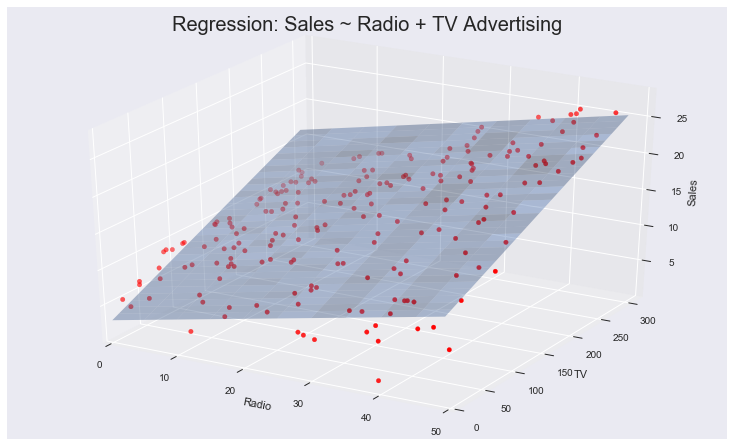

In [309]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

#### Figure 3.4

## Other Considerations in the Regression Model

In [312]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


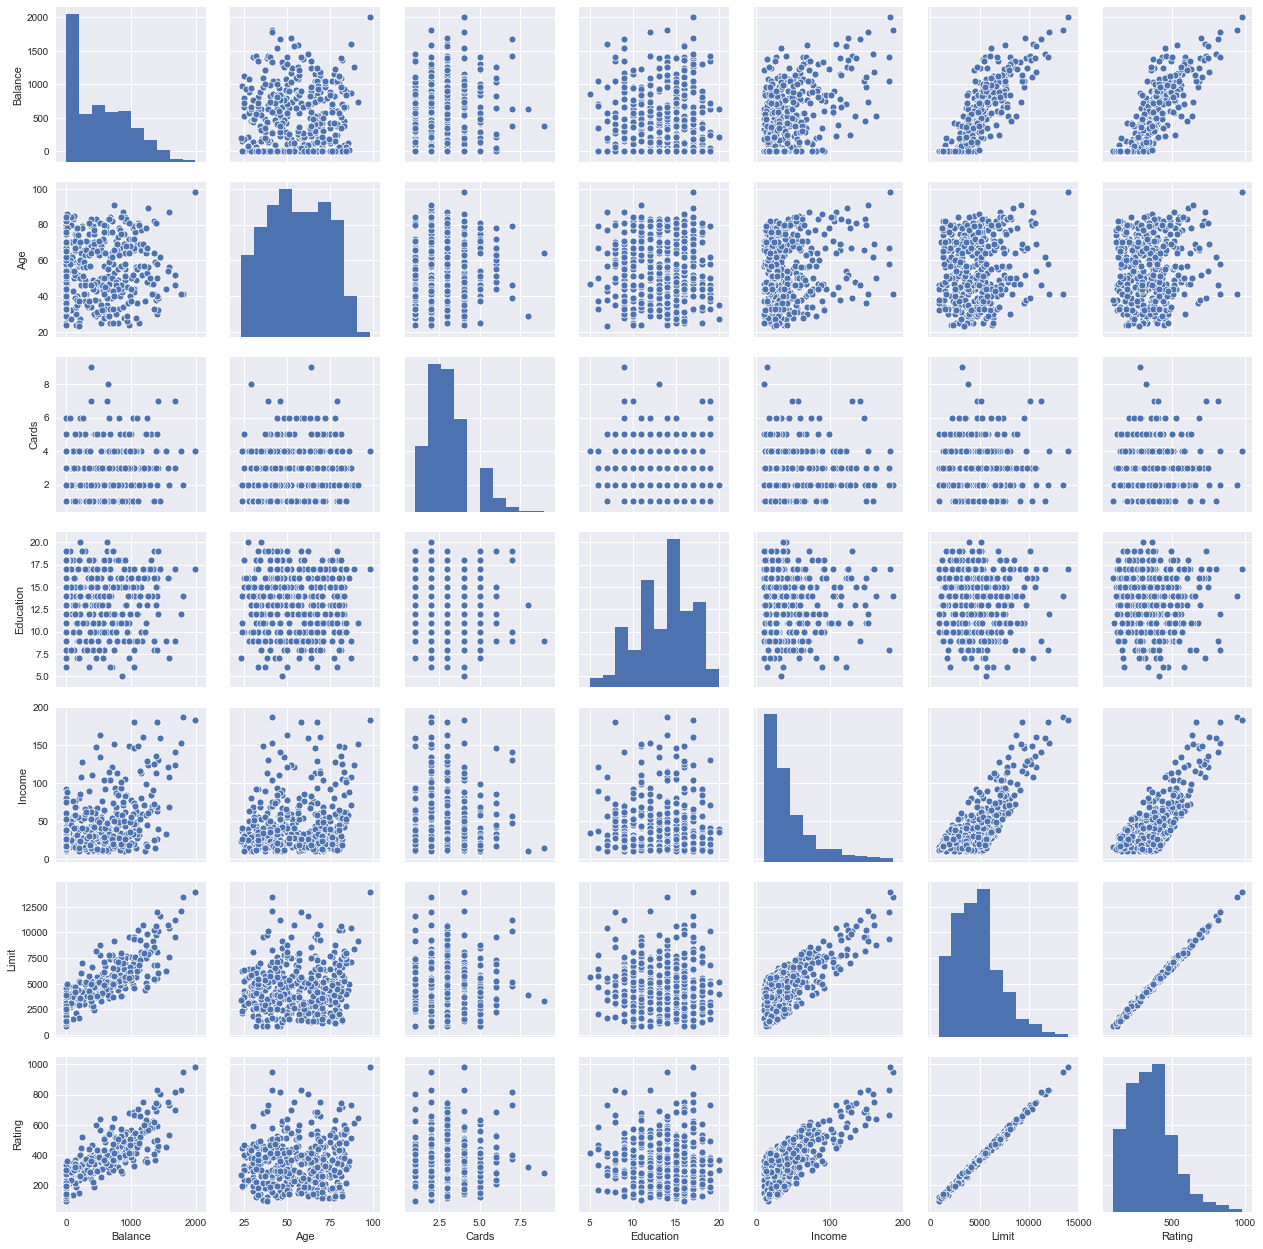

In [313]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

#### Figure 3.6

In [314]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [316]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [317]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [318]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


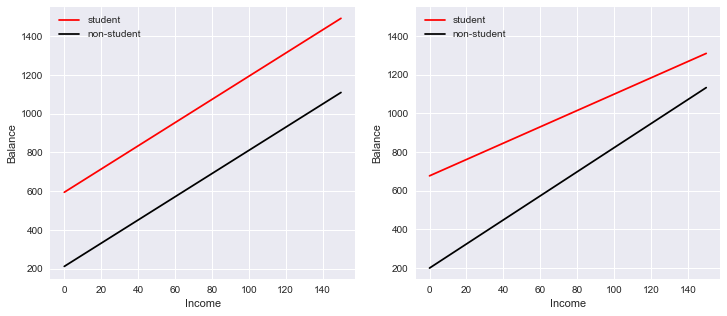

In [319]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

In [321]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


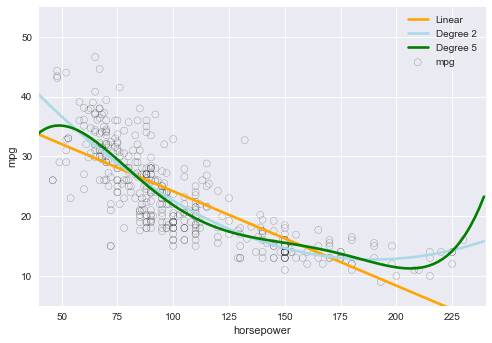

In [322]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [323]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [324]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [325]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


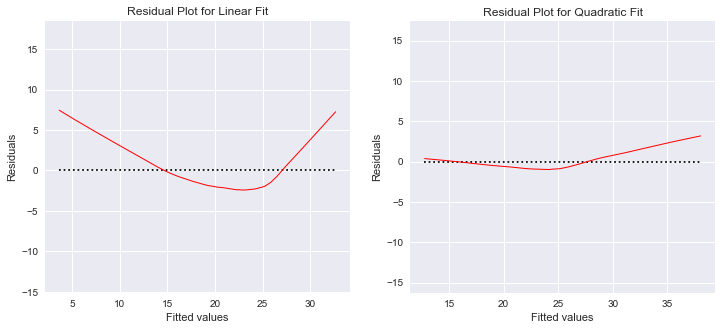

In [326]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

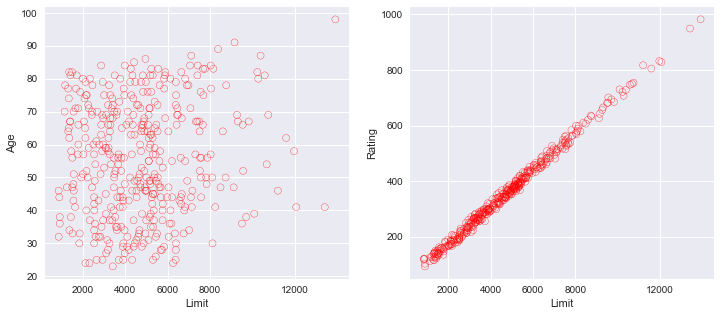

In [327]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In [328]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [330]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

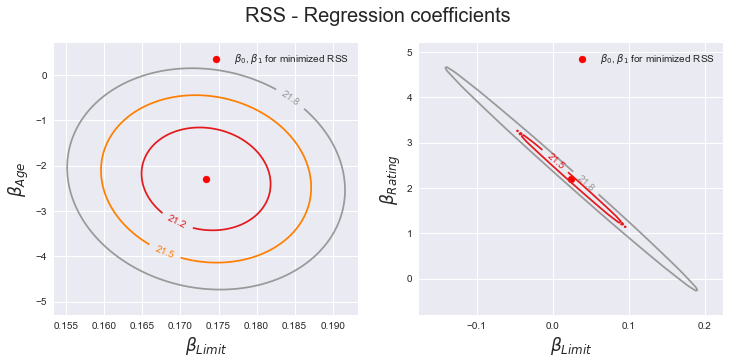

In [331]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

In [332]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


Ref

https://www.cnblogs.com/NaughtyBaby/p/5603309.html

http://qianjiye.de/2015/03/statistical-learning-linear-regression#outline_2